In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
data = pd.read_csv("../titanic.csv")

df = pd.DataFrame(data)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
fares = df["fare"].unique()

r_fares = []

for x in range(len(fares)):
    rounded = round(fares[x])
    r_fares.append(rounded)
    
def unique(list1): 
     # intilize a null list 
    unique_r = [] 
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_r: 
            unique_r.append(x) 
    print(len(unique_r))


    
unique(r_fares)


95


In [4]:
ages = ((df["age"]).dropna())

print(len(ages))

print(unique(ages))

1046
98
None


In [5]:
#342 Survivors, 545 Deceased

#make the ages whole numbers, add counter column
df["age"] = df["age"].round()

df["counter"] = 1

df = df.sort_values(by='age', axis=0, ascending=True)


ages = df['age'].unique().tolist()
age_counts = []

for i in ages:
    count = df.loc[df['age'] == i]
    age_counts.append(count['counter'].count())


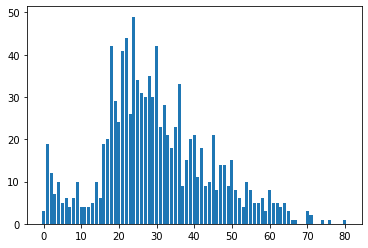

In [6]:
#bar chart of age distribution
plt.bar(ages, age_counts)
plt.show()

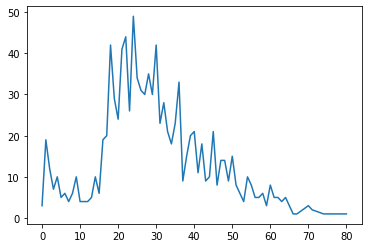

In [7]:
#line plot?
plt.plot(ages, age_counts)
plt.show()

In [8]:
survived_counts = []

for x in ages:
    select = df.loc[df['age'] == x]
    total = select['counter'].count()
    survivors = select.loc[select["survived"] == 1]
    survivor_count = survivors["survived"].sum()
    survived_counts.append(survivor_count)


In [9]:
deceased_counts = []

for i in range(len(age_counts)):
    dead = age_counts[i] - survived_counts[i]
    deceased_counts.append(dead)


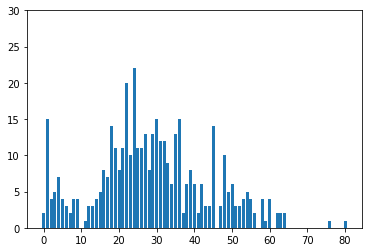

In [10]:
plt.bar(ages, survived_counts)
plt.ylim(top=30)
plt.show()

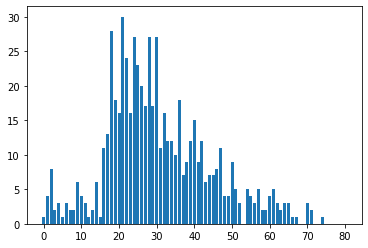

In [11]:
plt.bar(ages, deceased_counts)
plt.show()

In [12]:
percent_s = []
percent_d = []

for i in range(len(age_counts)):
    percent = (survived_counts[i]/age_counts[i])*100
    percent_s.append(round(percent))
    
for i in range(len(age_counts)):
    percent = (deceased_counts[i]/age_counts[i])*100
    percent_d.append(round(percent))


C:\Users\eg127\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """
C:\Users\eg127\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


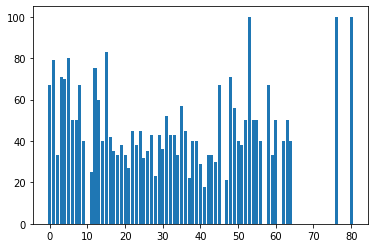

In [13]:
plt.bar(ages, percent_s)
plt.show()

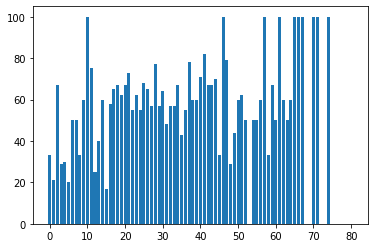

In [14]:
plt.bar(ages, percent_d)
plt.show()

In [20]:
new_data = {
    "age":ages,
    "total_onboard":age_counts,
    "survivors":survived_counts,
    "deceased":deceased_counts,
    "percent_s":percent_s,
    "percent_d":percent_d
}

In [23]:
new_df = pd.DataFrame(new_data)

new_df = new_df.dropna()

new_df.to_csv("ages.csv")